# <b><font color= 'red'> COMP244 – Machine Learning and Data Mining I </font></b>

## Project - Emotion classification

#### Andreas Neocleous, Maria Katsama

In [1]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Text Cleaning
import neattext.functions as nfx

#Keyword Extraction
from collections import Counter

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, plot_confusion_matrix

#Split Data
from sklearn.model_selection import train_test_split

#Save Trained Models
import joblib

## Data Importation/Inspection

In [2]:
df = pd.read_csv("train.csv")
df.head()

,text,emotion
0,Yeah for coupons! Found this place randomly ...,neutral
1,i still love to feel a gentle breeze and hear ...,happiness
2,"Normal, fama devido ao programa de tv. A sobre...",neutral
3,im feeling a little less jaded,sadness
4,i have never shaken the feeling of ferocious p...,hate


In [3]:
df.shape

(8000, 2)

In [4]:
#Check for missing values
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [5]:
#Check for duplicates
temp = df[df.duplicated()==True]
temp.shape

(0, 2)

In [6]:
df['emotion'].value_counts()

happiness    1468
neutral      1292
worry        1222
fun          1157
sadness      1146
hate         1143
surprise      572
Name: emotion, dtype: int64

<AxesSubplot:>

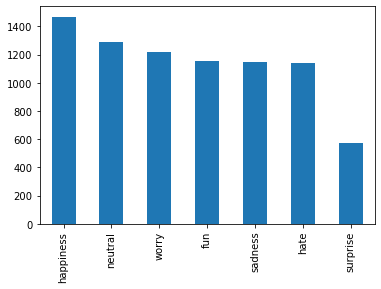

In [7]:
df['emotion'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='emotion', ylabel='count'>

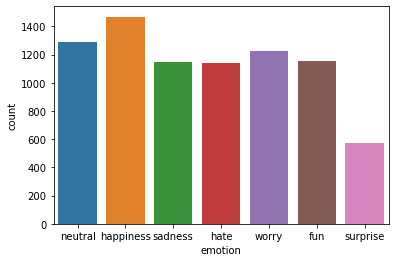

In [8]:
sns.countplot(x='emotion',data=df)

In [9]:
df['clean_text'] = df['text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)
df['clean_text'] = df['clean_text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
df['clean_text'] = df['clean_text'].apply(nfx.remove_emojis)
df.head()

,text,emotion,clean_text
0,Yeah for coupons! Found this place randomly ...,neutral,Yeah coupons Found place randomly like it lot ...
1,i still love to feel a gentle breeze and hear ...,happiness,love feel gentle breeze hear peal soft wind ch...
2,"Normal, fama devido ao programa de tv. A sobre...",neutral,Normal fama devido ao programa de tv sobremesa...
3,im feeling a little less jaded,sadness,im feeling little jaded
4,i have never shaken the feeling of ferocious p...,hate,shaken feeling ferocious protectiveness mother


In [10]:
emotion_list = df['emotion'].unique().tolist()
emotion_list

['neutral', 'happiness', 'sadness', 'hate', 'worry', 'fun', 'surprise']

## Tokenization and Emotion class plots

In [11]:
def extract_key_words(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [12]:
hate_list = df[df['emotion']=='hate']['clean_text'].tolist()
hate_docx = ' '.join(hate_list)
hate_docx

'shaken feeling ferocious protectiveness mother feel like real nut job freaked germs putting dangerous body feeling fucked pretty warm night know best good cant help feel irritated feel cold stony surface underneath feel jealous new children apprehensive longer favorite feel rebellious feel like stoner things alright feel like insulted know feel pain furious feel confused hurt furious feel extremely irritated self pitying subtext quote taking psychological toll colleagues want feel feeling offended people emotional state lately feel selfish know let spoil mood cause think little feel irritated love eyes think rest face comments feel like people overlook face distracted body feel bitter times feel enraged cruel sick malicious thoughtless existence forced live day day feel disgusted disappointed thinking think feel disgusted feel fought hard im feeling slightly offended feel little bit emptier ironically little bit envious feel sickened disgusted sins man despite divinity feel sickened d

In [13]:
hate_keys = extract_key_words(hate_docx)
hate_keys

{'feel': 763,
 'feeling': 370,
 'like': 202,
 'im': 175,
 'time': 67,
 'little': 64,
 'people': 58,
 'know': 55,
 'angry': 50,
 'think': 49,
 'things': 45,
 'want': 41,
 'way': 35,
 'bitter': 34,
 'frustrated': 34,
 'greedy': 34,
 'mad': 34,
 'going': 33,
 'cant': 32,
 'insulted': 32,
 'offended': 32,
 'selfish': 32,
 'irritable': 32,
 'resentful': 32,
 'dont': 32,
 'rushed': 32,
 'fucked': 31,
 'disgusted': 31,
 'annoyed': 31,
 'hated': 31,
 'today': 31,
 'cold': 30,
 'bit': 30,
 'violent': 29,
 'agitated': 28,
 'help': 27,
 'jealous': 27,
 'bothered': 27,
 'ive': 27,
 'cranky': 27,
 'rude': 27,
 'impatient': 26,
 'dissatisfied': 26,
 'stressed': 26,
 'right': 25,
 'irritated': 24,
 'feelings': 24,
 'bitchy': 24,
 'thing': 23,
 'got': 23}

In [14]:
def plot_words(doc):
    m_cloud = WordCloud().generate(doc)
    plt.figure(figsize=(20,10))
    plt.imshow(m_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

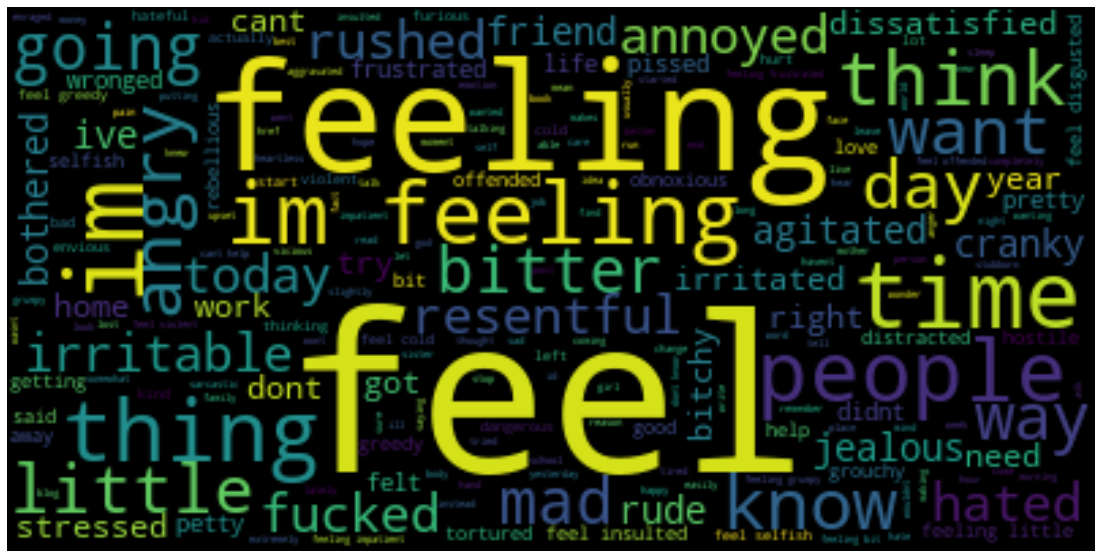

In [15]:
plot_words(hate_docx)

## Machine Learning 

In [16]:
Xfeatures = df['clean_text']
yfeatures = df['emotion']
Xfeatures

0       Yeah coupons Found place randomly like it lot ...
1       love feel gentle breeze hear peal soft wind ch...
2       Normal fama devido ao programa de tv sobremesa...
3                                 im feeling little jaded
4          shaken feeling ferocious protectiveness mother
                              ...                        
7995                     feel little weird telling people
7996                             feeling overwhelmed list
7997                         feel shocked words pure self
7998    Service sub par disappointing got food good ba...
7999                 feel like irritated wanna outta hear
Name: clean_text, Length: 8000, dtype: object

In [17]:
#Tokenizing with vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [18]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
#Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,yfeatures,test_size=0.3,random_state=50)

Note:
- We will have the same splitted sample for all of our models
- Every time we run the notebook this sample is changed thus our scores will be also different 

## Naive Bayes Classifier

In [20]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [21]:
#Accuracy
nv_model.score(X_test,y_test)

0.77875

In [22]:
y_nv_pred = nv_model.predict(X_test)
y_nv_pred

array(['happiness', 'neutral', 'hate', ..., 'worry', 'sadness', 'neutral'],
      dtype='<U9')

In [23]:
accuracy_score(y_test, y_nv_pred)

0.77875

In [24]:
sample_t = ['What a lovely day']
vect = cv.transform(sample_t).toarray()
prediction = nv_model.predict(vect)
print(prediction[0])

happiness


In [25]:
nv_model.predict_proba(vect)

array([[0.07078233, 0.49982235, 0.02340528, 0.32349525, 0.0641817 ,
        0.00642591, 0.01188719]])

In [26]:
nv_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype='<U9')

In [27]:
#Model Evaluation #
confusion_matrix(y_test,y_nv_pred)

array([[211,  84,  12,  12,  12,   2,  14],
       [  8, 395,   1,   4,   0,   0,   4],
       [  8,  27, 247,   6,  18,   0,  18],
       [  0,   0,   0, 409,   1,   8,   0],
       [ 12,  43,  29,   8, 233,   1,  34],
       [ 22,  23,  11,   5,   1,  67,  34],
       [  8,  26,  18,   5,   7,   5, 307]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


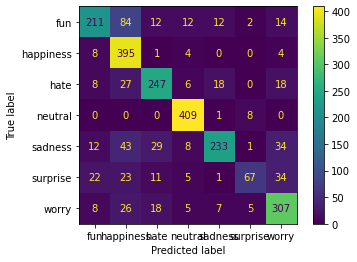

In [28]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [29]:
print(classification_report(y_test,y_nv_pred))

              precision    recall  f1-score   support

         fun       0.78      0.61      0.69       347
   happiness       0.66      0.96      0.78       412
        hate       0.78      0.76      0.77       324
     neutral       0.91      0.98      0.94       418
     sadness       0.86      0.65      0.74       360
    surprise       0.81      0.41      0.54       163
       worry       0.75      0.82      0.78       376

    accuracy                           0.78      2400
   macro avg       0.79      0.74      0.75      2400
weighted avg       0.79      0.78      0.77      2400



Save Model

In [30]:
model_file = open('emotional_classifier_nvModel.pkl','wb')
joblib.dump(nv_model,model_file)
model_file.close()

#### Building Naive-Bayes models with different parameters for tuning

In [31]:
#Initial model's score
nv_model.score(X_test,y_test)

0.77875

In [32]:
#Checking values for smoothing parameter
for i in (0.01,1.0,0.2):
    nv_temp_model = MultinomialNB(alpha = i)
    nv_temp_model.fit(X_train,y_train)
    print(nv_temp_model.score(X_test,y_test))

0.7170833333333333
0.77875
0.7766666666666666


In [33]:
#Learn class prior probabilities
nv_temp_model = MultinomialNB(fit_prior=True)
nv_temp_model.fit(X_train,y_train)
print(nv_temp_model.score(X_test,y_test))

0.77875


In [34]:
#Checking values for smoothing parameter, with learning class prior probabilities
for i in (0.01,1.0,0.2):
    nv_temp_model = MultinomialNB(alpha = i, fit_prior= True)
    nv_temp_model.fit(X_train,y_train)
    print(nv_temp_model.score(X_test,y_test))

0.7170833333333333
0.77875
0.7766666666666666


Our initial model has both better scoring and simplicity

## Logistic Regression

In [35]:
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train,y_train)

lr_model.score(X_test,y_test)

0.89125

In [36]:
y_lr_pred = lr_model.predict(X_test)
y_lr_pred

array(['happiness', 'neutral', 'hate', ..., 'surprise', 'sadness',
       'neutral'], dtype=object)

In [37]:
accuracy_score(y_test, y_lr_pred)

0.89125

In [38]:
sample_t = ['What a lovely day.']
vect = cv.transform(sample_t).toarray()
prediction = lr_model.predict(vect)
print(prediction[0])

happiness


In [39]:
lr_model.predict_proba(vect)

array([[0.09630701, 0.61625961, 0.05429772, 0.12513659, 0.06178814,
        0.01122273, 0.0349882 ]])

In [40]:
lr_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [41]:
#Model Evaluation
confusion_matrix(y_test,y_lr_pred)

array([[288,  32,   6,   1,  10,   6,   4],
       [  9, 400,   1,   0,   0,   1,   1],
       [  7,   4, 284,   1,  18,   2,   8],
       [  4,   0,   2, 408,   3,   1,   0],
       [ 20,   5,  15,   0, 310,   1,   9],
       [  7,   1,   2,   0,   4, 141,   8],
       [  4,   3,  20,   1,  10,  30, 308]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


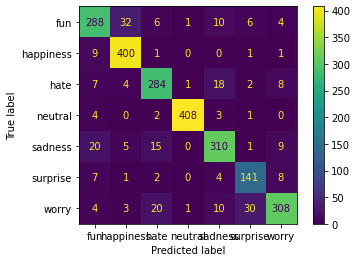

In [42]:
plot_confusion_matrix(lr_model,X_test,y_test)

In [43]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

         fun       0.85      0.83      0.84       347
   happiness       0.90      0.97      0.93       412
        hate       0.86      0.88      0.87       324
     neutral       0.99      0.98      0.98       418
     sadness       0.87      0.86      0.87       360
    surprise       0.77      0.87      0.82       163
       worry       0.91      0.82      0.86       376

    accuracy                           0.89      2400
   macro avg       0.88      0.89      0.88      2400
weighted avg       0.89      0.89      0.89      2400



#### Building Logistic Regression models with different parameters for tuning

In [44]:
#Initial model's score
lr_model.score(X_test,y_test)

0.89125

In [45]:
temp_lr_model = LogisticRegression(penalty='none', max_iter=3000)
temp_lr_model.fit(X_train,y_train)
print(temp_lr_model.score(X_test,y_test))

0.8329166666666666


In [46]:
for i in (0.01,0.3,0.2):
    temp_lr_model = LogisticRegression(C=i)
    temp_lr_model.fit(X_train,y_train)
    print(temp_lr_model.score(X_test,y_test))

0.5225
0.885
0.8775


In [47]:
temp_lr_model = LogisticRegression(C=0.95,fit_intercept=False)
temp_lr_model.fit(X_train,y_train)
print(temp_lr_model.score(X_test,y_test))

0.8958333333333334


Nothing of signifigance. Best effort was 0.2% better than with no parameters

## Decision Tree Classifier

In [48]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

dtc_model.score(X_test,y_test)

0.83

In [49]:
y_dtc_pred = dtc_model.predict(X_test)
y_dtc_pred

array(['fun', 'neutral', 'hate', ..., 'worry', 'sadness', 'neutral'],
      dtype=object)

In [50]:
accuracy_score(y_test, y_dtc_pred)

0.83

In [51]:
sample_t = ['What a lovely day']
vect = cv.transform(sample_t).toarray()
prediction = dtc_model.predict(vect)
print(prediction[0])

happiness


In [52]:
dtc_model.predict_proba(vect)

array([[0., 1., 0., 0., 0., 0., 0.]])

In [53]:
dtc_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [54]:
#Model Evaluation
confusion_matrix(y_test,y_dtc_pred)

array([[230,  28,   6,   3,  71,   5,   4],
       [ 20, 383,   1,   3,   3,   1,   1],
       [  5,   5, 288,   0,   9,   4,  13],
       [  5,  14,  21, 366,   4,   7,   1],
       [ 35,   8,  23,   3, 282,   2,   7],
       [  7,   0,   0,   3,   3, 131,  19],
       [  6,   7,  17,   1,  10,  23, 312]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


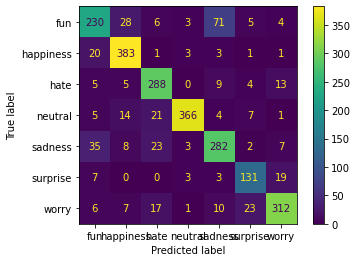

In [55]:
plot_confusion_matrix(dtc_model,X_test,y_test)

In [56]:
print(classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

         fun       0.75      0.66      0.70       347
   happiness       0.86      0.93      0.89       412
        hate       0.81      0.89      0.85       324
     neutral       0.97      0.88      0.92       418
     sadness       0.74      0.78      0.76       360
    surprise       0.76      0.80      0.78       163
       worry       0.87      0.83      0.85       376

    accuracy                           0.83      2400
   macro avg       0.82      0.82      0.82      2400
weighted avg       0.83      0.83      0.83      2400



#### Building Decision Tree Classifier models with different parameters for tuning

In [57]:
#Initial model's score
dtc_model.score(X_test,y_test)

0.83

In [58]:
temp_dtc_model = DecisionTreeClassifier(criterion = "entropy")
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.8058333333333333


In [59]:
temp_dtc_model = DecisionTreeClassifier(splitter='best')
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.8279166666666666


In [60]:
temp_dtc_model = DecisionTreeClassifier(max_depth = 470,splitter='best')
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.8258333333333333


In [61]:
temp_dtc_model = DecisionTreeClassifier(splitter='best', min_samples_split = 3)
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.8266666666666667


In [62]:
temp_dtc_model = DecisionTreeClassifier(splitter='best', max_features = 'sqrt')
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.6604166666666667


In [63]:
temp_dtc_model = DecisionTreeClassifier(max_depth = 480, max_leaf_nodes = 350)
temp_dtc_model.fit(X_train,y_train)
print(temp_dtc_model.score(X_test,y_test))

0.8304166666666667


One our last effort we gained 1% better performance

## K-NN Classifier

In [64]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.40958333333333335

In [65]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.4266666666666667

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.42541666666666667

In [67]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train,y_train)

knn_model.score(X_test,y_test)

0.46166666666666667

#### As we can see we have better score for k=1

In [68]:
y_knn_pred = knn_model.predict(X_test)
y_knn_pred

array(['fun', 'happiness', 'hate', ..., 'worry', 'worry', 'fun'],
      dtype=object)

In [69]:
sample_t = ['What a lovely day']
vect = cv.transform(sample_t).toarray()
prediction = knn_model.predict(vect)
print(prediction[0])

happiness


In [70]:
knn_model.predict_proba(vect)

array([[0., 1., 0., 0., 0., 0., 0.]])

In [71]:
knn_model.classes_

array(['fun', 'happiness', 'hate', 'neutral', 'sadness', 'surprise',
       'worry'], dtype=object)

In [72]:
confusion_matrix(y_test,y_knn_pred)

array([[102,  56,  35,   0,  80,   9,  65],
       [ 35, 251,  25,   0,  50,   6,  45],
       [ 19,  37, 176,   0,  60,   2,  30],
       [109,  54,  55, 101,  64,  18,  17],
       [ 33,  34,  36,   0, 192,   8,  57],
       [ 11,  12,   8,   0,  17,  87,  28],
       [ 20,  27,  50,   0,  57,  23, 199]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


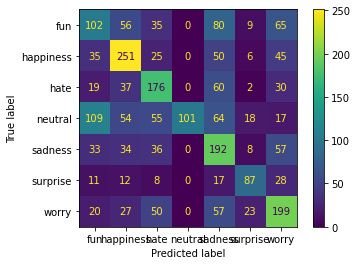

In [73]:
plot_confusion_matrix(knn_model,X_test,y_test)

In [74]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

         fun       0.31      0.29      0.30       347
   happiness       0.53      0.61      0.57       412
        hate       0.46      0.54      0.50       324
     neutral       1.00      0.24      0.39       418
     sadness       0.37      0.53      0.44       360
    surprise       0.57      0.53      0.55       163
       worry       0.45      0.53      0.49       376

    accuracy                           0.46      2400
   macro avg       0.53      0.47      0.46      2400
weighted avg       0.54      0.46      0.46      2400



#### Building KNN models with different parameters for tuning

In [75]:
#Initial model's score
knn_model.score(X_test,y_test)

0.46166666666666667

In [76]:
temp_knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
temp_knn_model.fit(X_train,y_train)
temp_knn_model.score(X_test,y_test)

0.47333333333333333

In [77]:
temp_knn_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm='brute')
temp_knn_model.fit(X_train,y_train)
temp_knn_model.score(X_test,y_test)

0.47333333333333333

Gained 1.2% but compared to other models it is still far off

## SVM Classifier

In [78]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

svm_model.score(X_test,y_test)

0.8420833333333333

In [79]:
y_svm_pred = svm_model.predict(X_test)
y_svm_pred

array(['happiness', 'neutral', 'hate', ..., 'surprise', 'sadness',
       'neutral'], dtype=object)

In [80]:
sample_t = ['What a lovely day']
vect = cv.transform(sample_t).toarray()
prediction = svm_model.predict(vect)
print(prediction[0])

happiness


In [81]:
confusion_matrix(y_test,y_svm_pred)

array([[265,  34,   6,   1,  31,   3,   7],
       [ 11, 391,   2,   3,   3,   2,   0],
       [ 22,   6, 252,   2,  24,   3,  15],
       [  5,   0,   1, 412,   0,   0,   0],
       [ 47,  10,  19,   4, 269,   1,  10],
       [ 20,   2,   1,   0,   2, 127,  11],
       [ 11,   7,  13,   3,  11,  26, 305]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


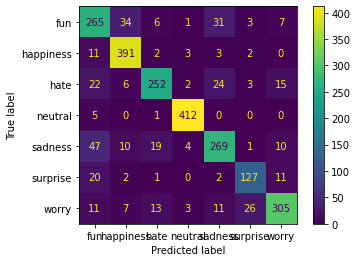

In [82]:
plot_confusion_matrix(svm_model,X_test,y_test)

In [83]:
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

         fun       0.70      0.76      0.73       347
   happiness       0.87      0.95      0.91       412
        hate       0.86      0.78      0.82       324
     neutral       0.97      0.99      0.98       418
     sadness       0.79      0.75      0.77       360
    surprise       0.78      0.78      0.78       163
       worry       0.88      0.81      0.84       376

    accuracy                           0.84      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.84      0.84      0.84      2400



#### Building SVM models with different parameters for tuning

In [84]:
#Initial model's score
svm_model.score(X_test,y_test)

0.8420833333333333

In [85]:
temp_svm_model = svm.SVC(kernel='linear')
temp_svm_model.fit(X_train,y_train)
temp_svm_model.score(X_test,y_test)

0.8954166666666666

In [86]:
temp_svm_model = svm.SVC(kernel='poly')
temp_svm_model.fit(X_train,y_train)
temp_svm_model.score(X_test,y_test)

0.24208333333333334

In [87]:
temp_svm_model = svm.SVC(kernel='linear', gamma = 'auto')
temp_svm_model.fit(X_train,y_train)
temp_svm_model.score(X_test,y_test)

0.8954166666666666

In [88]:
temp_svm_model = svm.SVC(kernel='linear', break_ties = True)
temp_svm_model.fit(X_train,y_train)
temp_svm_model.score(X_test,y_test)

0.8958333333333334

Tuning gave us a 5% better score

## Neural Network Classiffier

In [89]:
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2),
                    random_state=1,
                    max_iter=3000)

nn_model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=3000,
              random_state=1, solver='lbfgs')

In [90]:
y_nn_pred = nn_model.predict(X_test)
y_nn_pred

array(['happiness', 'neutral', 'hate', ..., 'worry', 'worry', 'hate'],
      dtype='<U9')

In [91]:
accuracy_score(y_test, y_nn_pred)

0.53375

In [92]:
sample_t = ['What a lovely day']
vect = cv.transform(sample_t).toarray()
prediction = nn_model.predict(vect)
print(prediction[0])

happiness


In [93]:
confusion_matrix(y_test,y_nn_pred)

array([[125,  23,  83,  23,  58,   3,  32],
       [ 13, 329,  69,   0,   0,   1,   0],
       [ 41,  39, 229,   2,   8,   2,   3],
       [  5,   1,   4, 402,   3,   2,   1],
       [104,  10,  55,  40,  87,   8,  56],
       [ 23,   2,  10,  56,  16,  10,  46],
       [ 52,   4,  45,  97,  59,  20,  99]], dtype=int64)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


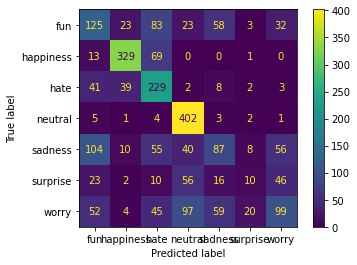

In [94]:
plot_confusion_matrix(nn_model,X_test,y_test)

In [95]:
print(classification_report(y_test,y_nn_pred))

              precision    recall  f1-score   support

         fun       0.34      0.36      0.35       347
   happiness       0.81      0.80      0.80       412
        hate       0.46      0.71      0.56       324
     neutral       0.65      0.96      0.77       418
     sadness       0.38      0.24      0.29       360
    surprise       0.22      0.06      0.10       163
       worry       0.42      0.26      0.32       376

    accuracy                           0.53      2400
   macro avg       0.47      0.48      0.46      2400
weighted avg       0.50      0.53      0.50      2400



#### Building Neural Network models with different parameters for tuning

In [96]:
temp_nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.8433333333333334

In [97]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.84625

In [98]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(90, 2),
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.6129166666666667

In [99]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(150, 2),
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.6133333333333333

In [100]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(150,),
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.8516666666666667

In [101]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(200,2),
                    random_state=1,
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.6508333333333334

In [102]:
temp_nn_model = MLPClassifier(solver='adam', alpha=1e-5,
                    random_state=1,
                    batch_size=min(400,400),          
                    max_iter=3000)

temp_nn_model.fit(X_train, y_train)
temp_nn_model.score(X_test,y_test)

0.8475

In [103]:
nn_model = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(150,),
                    random_state=1,
                    max_iter=3000)

nn_model.fit(X_train, y_train)
nn_model.score(X_test,y_test)

0.88875

+ After tuning our best score was 88,88%
+ Our best result using 'sgd' as solver 3% better than 'adam'. We would consider using 'adam' if the data was even bigger

## Top 3 models (after tuning):
+ SVM: 89,58%
+ Logistic Regression: 89,58%
+ Neural Network: 88,88%

0.8958333333333334


C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


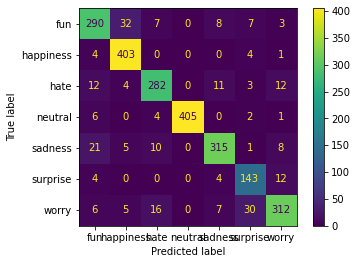

In [104]:
svm_model = svm.SVC(kernel='linear', break_ties = True)
svm_model.fit(X_train,y_train)
print(svm_model.score(X_test,y_test))

plot_confusion_matrix(svm_model,X_test,y_test)

0.8958333333333334


C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


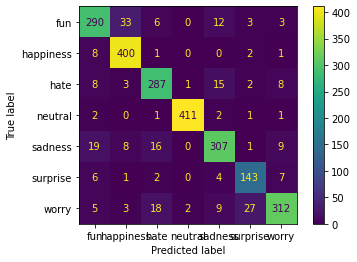

In [105]:
lr_model = LogisticRegression(C=0.95,fit_intercept=False)
lr_model.fit(X_train,y_train)
print(lr_model.score(X_test,y_test))

plot_confusion_matrix(lr_model,X_test,y_test)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


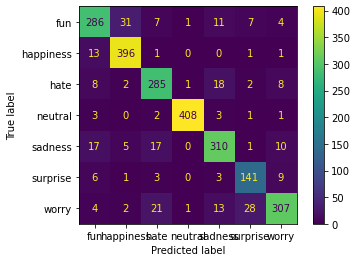

In [106]:
plot_confusion_matrix(nn_model,X_test,y_test)

In [107]:
combo_model1 = VotingClassifier(estimators=[('lr',lr_model),('svm',svm_model),('nn',nn_model)],
                                weights=[1.1,1,1])

In [108]:
combo_model1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.95, fit_intercept=False)),
                             ('svm', SVC(break_ties=True, kernel='linear')),
                             ('nn',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(150,),
                                            max_iter=3000, random_state=1,
                                            solver='sgd'))],
                 weights=[1.1, 1, 1])

In [109]:
combo_model1.score(X_test,y_test)

0.8954166666666666

In [110]:
y_combo_pred = combo_model1.predict(X_test)
y_combo_pred

array(['happiness', 'neutral', 'hate', ..., 'surprise', 'sadness',
       'neutral'], dtype=object)

In [111]:
combo_model2 = StackingClassifier(estimators=[('lr',lr_model),('svm',svm_model)])

In [112]:
combo_model2.fit(X_train,y_train)

C:\Users\ToManari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.95,
                                                   fit_intercept=False)),
                               ('svm', SVC(break_ties=True, kernel='linear'))])

In [113]:
combo_model2.score(X_test,y_test)

0.8983333333333333

### Top 5 models:
    1. Stacking Classifier (LogisticRegression, SVM): .8983 (Not all interations completed)

    2. Logistic Regression: .8958
       SVM: .8958

    3. Voting Classifier (LogisticRegression, SVM, NeuralNetwork) .8954
    
    4. Neural Network: .8888

## Final Decision:
We are not going to use stacking classifier as long as it was not fully concluded. Neural Network model is slower than the others and it does not produces better score than the others. 
StackingClassifier has .025% better scoring than the second best model we produced but works slow due to the neural network model that is embedded in it.
+ We are selecting as our final model for this problem to be the SVM model. 
